# Recurrent Neural Networks - RNN

## Loading Important Libraries and Data

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load training data
train_data = pd.read_csv('data/Google_Stock_Price_Train.csv')

# Load test data
test_data = pd.read_csv('data/Google_Stock_Price_Test.csv')

# Display the first few rows of each dataset
print("Training Data:")
print(train_data.head(60))
print("\nTest Data:")
print(test_data.head(20))

Training Data:
         Date    Open    High     Low   Close      Volume
0    1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1    1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2    1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3    1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4    1/9/2012  322.04  322.29  309.46  620.76  11,688,800
5   1/10/2012  313.70  315.72  307.30  621.43   8,824,000
6   1/11/2012  310.59  313.52  309.40  624.25   4,817,800
7   1/12/2012  314.43  315.26  312.08  627.92   3,764,400
8   1/13/2012  311.96  312.30  309.37  623.28   4,631,800
9   1/17/2012  314.81  314.81  311.67  626.86   3,832,800
10  1/18/2012  312.14  315.82  309.90  631.18   5,544,000
11  1/19/2012  319.30  319.30  314.55  637.82  12,657,800
12  1/20/2012  294.16  294.40  289.76  584.39  21,231,800
13  1/23/2012  291.91  293.23  290.49  583.92   6,851,300
14  1/24/2012  292.07  292.74  287.92  579.34   6,134,400
15  1/25/2012  287.68  288.27  282.13  567.93  10,012,700

## Data Inspection

In [4]:
# Training Data
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [5]:
# Testing Data
test_data.info()
test_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


,Open,High,Low,Close
count,20.000000,20.000000,20.000000,20.000000
mean,807.526000,811.926500,801.949500,807.904500
std,15.125428,14.381198,13.278607,13.210088
min,778.810000,789.630000,775.800000,786.140000
25%,802.965000,806.735000,797.427500,802.282500
50%,806.995000,808.640000,801.530000,806.110000
75%,809.560000,817.097500,804.477500,810.760000
max,837.810000,841.950000,827.010000,835.670000


# Pre-Processing

### Converting Volume to Float. and before doing that making sure there are no commas in the volume column

In [6]:
# Converting Volume data Type from Object to Float

#print(train_data['Volume'].dtype)
train_data['Volume'] = train_data['Volume'].str.replace(',', '')
test_data['Volume'] = test_data['Volume'].str.replace(',', '')
train_data['Volume'] = train_data['Volume'].astype(float)
test_data['Volume'] = test_data['Volume'].astype(float)

print(train_data['Volume'].info())
print(train_data['Volume'].head())
print(test_data['Volume'].head())

<class 'pandas.core.series.Series'>
RangeIndex: 1258 entries, 0 to 1257
Series name: Volume
Non-Null Count  Dtype  
--------------  -----  
1258 non-null   float64
dtypes: float64(1)
memory usage: 10.0 KB
None
0     7380500.0
1     5749400.0
2     6590300.0
3     5405900.0
4    11688800.0
Name: Volume, dtype: float64
0    1657300.0
1    1073000.0
2    1335200.0
3    1640200.0
4    1272400.0
Name: Volume, dtype: float64


### Converting Date column - Object Type to datetime Format

In [7]:
# Convert 'Date' column to datetime format
train_data['Date'] = pd.to_datetime(train_data['Date'], format='%m/%d/%Y')
test_data['Date'] = pd.to_datetime(test_data['Date'], format='%m/%d/%Y')

# Verify the conversion
print(train_data['Date'].head())
print(test_data['Date'].head())
print(train_data.dtypes)  # Ensure 'Date' is now datetime64[ns]

0   2012-01-03
1   2012-01-04
2   2012-01-05
3   2012-01-06
4   2012-01-09
Name: Date, dtype: datetime64[ns]
0   2017-01-03
1   2017-01-04
2   2017-01-05
3   2017-01-06
4   2017-01-09
Name: Date, dtype: datetime64[ns]
Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close             object
Volume           float64
dtype: object


### Converting Close in the train_data - Object to float

In [8]:
# Remove commas and convert 'Close' to numeric
train_data['Close'] = train_data['Close'].str.replace(',', '').astype(float)

# Verify the changes
print(train_data['Close'].dtypes)  # float64
print(train_data['Close'].head())

float64
0    663.59
1    666.45
2    657.21
3    648.24
4    620.76
Name: Close, dtype: float64


## Feature and Target seperation


In [9]:
# Features and Target
X = train_data[['Open', 'High', 'Low', 'Close', 'Volume']]  # Features
y = train_data['Close']  # Target (next day's Close price)

## MinMax Scaling to features and Target

In [10]:
# Apply Min-Max Scaling to Features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)  # Scale the entire feature set

# Apply Min-Max Scaling to Target
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()  # Scale target and flatten back to 1D

## Creation of Sequences

In [11]:
# Create sequences of past N days for features
N = 7 # Number of past days
M = 1   # Predicting next 1 day

# Generate sequences
def create_sequences(data, target, n_steps):
    X_seq, y_seq = [], []
    for i in range(len(data) - n_steps):
        X_seq.append(data[i:i + n_steps])  # Past n_steps days
        y_seq.append(target[i + n_steps])  # Next day
    return np.array(X_seq), np.array(y_seq)

# Generate sequences using scaled data
X_seq, y_seq = create_sequences(X_scaled, y_scaled, N)

## Splitting training and validation set

In [12]:
# Split into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Check shapes
print(f"Training Shape: {X_train.shape}, {y_train.shape}")
print(f"Validation Shape: {X_val.shape}, {y_val.shape}")

Training Shape: (1000, 7, 5), (1000,)
Validation Shape: (251, 7, 5), (251,)


# Vanilla RNN

In [62]:
# Patches for deprecated NumPy attributes
np.object = object
np.bool = bool
np.int = int

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Input

model = Sequential([
    SimpleRNN(50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.1),
    # SimpleRNN(32, activation='tanh', return_sequences=True),
    # Dropout(0.1),
    # SimpleRNN(32, activation='tanh', return_sequences=True),
    # Dropout(0.1),
    SimpleRNN(50, activation='tanh', return_sequences=True),
    Dropout(0.1),
    SimpleRNN(50, activation='tanh', return_sequences=False),
    Dropout(0.1),
    # Dense(32, activation='relu'),
    # Dropout(0.1),
    # Dense(32, activation='relu'),
    # Dropout(0.1),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Early stopping for better generalization
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Summary of the model
model.summary()v

Epoch 1/100


C:\Users\akifk\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2030 - mae: 0.3559 - val_loss: 0.0175 - val_mae: 0.1035
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1002 - mae: 0.2534 - val_loss: 0.0069 - val_mae: 0.0542
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0601 - mae: 0.1908 - val_loss: 0.0067 - val_mae: 0.0563
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0478 - mae: 0.1704 - val_loss: 0.0057 - val_mae: 0.0540
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0317 - mae: 0.1377 - val_loss: 0.0150 - val_mae: 0.1054
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0230 - mae: 0.1188 - val_loss: 0.0048 - val_mae: 0.0472
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0227 - mae: 0.1153 - val_loss: 0.0157 - val_mae: 0.1061
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0217 - mae: 0.1136 - val_loss: 0.0064 - val_mae: 0.0586
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0155 - mae: 0.

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_83 (SimpleRNN)       │ (None, 7, 50)          │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_112 (Dropout)           │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_84 (SimpleRNN)       │ (None, 7, 50)          │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_113 (Dropout)           │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_85 (SimpleRNN)       │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_114 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,855 (151.78 KB)

 Trainable params: 12,951 (50.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,904 (101.19 KB)

### Visualize Training Progress

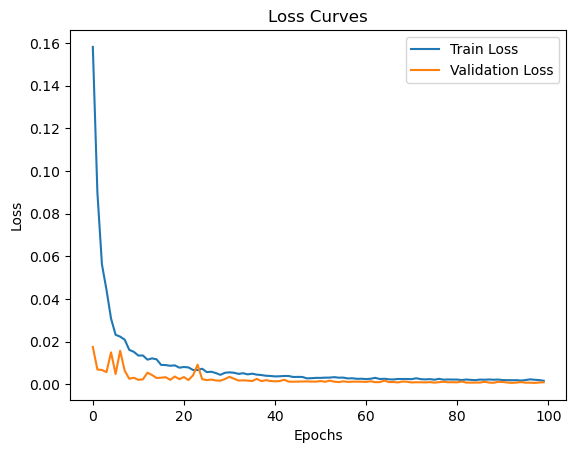

In [64]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Evaluate on the Test Set

In [65]:
# Feature and Target Separation for Test Data
X_test = test_data[['Open', 'High', 'Low', 'Close', 'Volume']]  # Features
y_test = test_data['Close']  # Target (next day's Close price)

# Scaling Test Features and Target
X_test_scaled = scaler_X.transform(X_test)  # Use the same scaler from training
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()  # Scale target

# Sequence Generation for Test Data
def create_sequences(data, target, n_steps):
    X_seq, y_seq = [], []
    for i in range(len(data) - n_steps):
        X_seq.append(data[i:i + n_steps])  # Past n_steps days
        y_seq.append(target[i + n_steps])  # Next day
    return np.array(X_seq), np.array(y_seq)

# Dynamically Adjust Sequence Length (N) Based on Test Data Size
N = 7 # Ensure N is less than the test data size
print(f"Adjusted sequence length for test data: {N}")

# Generate sequences for test data
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, N)

# Verify the shapes of test sequences
print(f"X_test_seq shape: {X_test_seq.shape}")
print(f"y_test_seq shape: {y_test_seq.shape}")

# Check if sequences are generated
if X_test_seq.shape[0] > 0:
    # Predict on Test Data
    y_test_pred = model.predict(X_test_seq)

    # Evaluate Model Performance
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

    mse = mean_squared_error(y_test_seq, y_test_pred)
    mae = mean_absolute_error(y_test_seq, y_test_pred)
    r2 = r2_score(y_test_seq, y_test_pred)

    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"R² Score: {r2}")

    # Optional: Inverse Transform Predictions to Original Scale
    y_test_pred_original = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1))
    y_test_seq_original = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1))

    print("Sample Predictions (Original Scale):")
    print(f"Predicted: {y_test_pred_original[:5].flatten()}")
    print(f"Actual: {y_test_seq_original[:5].flatten()}")
else:
    print("Not enough test data to generate sequences.")

Adjusted sequence length for test data: 7
X_test_seq shape: (13, 7, 5)
y_test_seq shape: (13,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
MSE: 0.00021981661343233226
MAE: 0.011317469580838303
R² Score: 0.20410624332901983
Sample Predictions (Original Scale):
Predicted: [804.2996  805.2546  804.3088  802.3009  802.55853]
Actual: [806.36 807.88 804.61 806.07 802.17]


### Plot Actual vs. Predicted Values

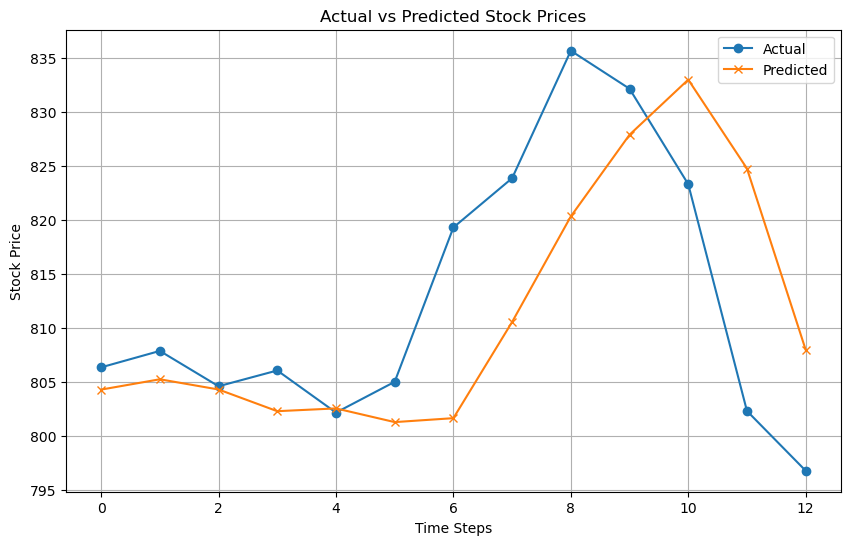

In [66]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_seq_original, label='Actual', marker='o')  # Actual values
plt.plot(y_test_pred_original, label='Predicted', marker='x')  # Predicted values
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()

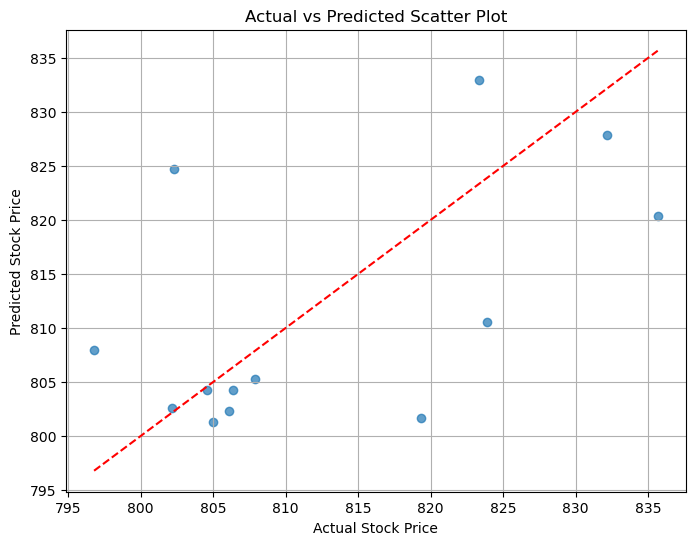

In [67]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test_seq_original, y_test_pred_original, alpha=0.7)
plt.plot([min(y_test_seq_original), max(y_test_seq_original)], 
         [min(y_test_seq_original), max(y_test_seq_original)], 
         color='red', linestyle='--')  # Perfect prediction line
plt.title('Actual vs Predicted Scatter Plot')
plt.xlabel('Actual Stock Price')
plt.ylabel('Predicted Stock Price')
plt.grid()
plt.show()


## HyperParameter Tuning with Grid Search

In [69]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Define hyperparameter grid
param_grid = {
    'units': [32, 50, 64],           # Number of RNN units
    'dropout_rate': [0.1, 0.2],     # Dropout rates
    'learning_rate': [0.001, 0.01], # Learning rates
    'batch_size': [32, 64],         # Batch sizes
    'num_layers': [2, 3]            # Number of RNN layers
}

# Placeholder for results
results = []

# Grid Search
for units in param_grid['units']:
    for dropout_rate in param_grid['dropout_rate']:
        for learning_rate in param_grid['learning_rate']:
            for batch_size in param_grid['batch_size']:
                for num_layers in param_grid['num_layers']:
                    
                    # Build the model dynamically
                    model = Sequential()
                    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
                    
                    # Add RNN layers dynamically
                    for layer in range(num_layers):
                        return_sequences = layer < (num_layers - 1)  # Only last layer should not return sequences
                        model.add(SimpleRNN(units, activation='tanh', return_sequences=return_sequences))
                        model.add(Dropout(dropout_rate))
                    
                    # Output layer
                    model.add(Dense(1))
                    
                    # Compile the model
                    optimizer = Adam(learning_rate=learning_rate)
                    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
                    
                    # Train the model
                    history = model.fit(
                        X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=50,  # Reduced for faster grid search
                        batch_size=batch_size,
                        verbose=0  # Suppress training output
                    )
                    
                    # Evaluate on validation data
                    val_loss = history.history['val_loss'][-1]
                    val_mae = history.history['val_mae'][-1]
                    
                    # Append results
                    results.append({
                        'units': units,
                        'dropout_rate': dropout_rate,
                        'learning_rate': learning_rate,
                        'batch_size': batch_size,
                        'num_layers': num_layers,
                        'val_loss': val_loss,
                        'val_mae': val_mae
                    })
                    
                    print(f"Tested combination: units={units}, dropout_rate={dropout_rate}, learning_rate={learning_rate}, batch_size={batch_size}, num_layers={num_layers}")
                    print(f"Validation Loss: {val_loss:.6f}, Validation MAE: {val_mae:.6f}")

# Convert results to a structured format
import pandas as pd
results_df = pd.DataFrame(results)

# Display the best combination
best_combination = results_df.loc[results_df['val_loss'].idxmin()]
print("\nBest Hyperparameters:")
print(best_combination)

Tested combination: units=32, dropout_rate=0.1, learning_rate=0.001, batch_size=32, num_layers=2
Validation Loss: 0.000787, Validation MAE: 0.015655
Tested combination: units=32, dropout_rate=0.1, learning_rate=0.001, batch_size=32, num_layers=3
Validation Loss: 0.002241, Validation MAE: 0.020430
Tested combination: units=32, dropout_rate=0.1, learning_rate=0.001, batch_size=64, num_layers=2
Validation Loss: 0.001294, Validation MAE: 0.020995
Tested combination: units=32, dropout_rate=0.1, learning_rate=0.001, batch_size=64, num_layers=3
Validation Loss: 0.002447, Validation MAE: 0.021096
Tested combination: units=32, dropout_rate=0.1, learning_rate=0.01, batch_size=32, num_layers=2
Validation Loss: 0.000670, Validation MAE: 0.016742
Tested combination: units=32, dropout_rate=0.1, learning_rate=0.01, batch_size=32, num_layers=3
Validation Loss: 0.002433, Validation MAE: 0.031435
Tested combination: units=32, dropout_rate=0.1, learning_rate=0.01, batch_size=64, num_layers=2
Validation L

### Retraining the Model with the best Parameters

In [70]:
# # Rebuild the model with the best hyperparameters
# final_model = Sequential([
#     SimpleRNN(
#         units=32,  # Best number of units
#         activation='tanh',
#         input_shape=(X_train.shape[1], X_train.shape[2])  # Input shape: (timesteps, features)
#     ),
#     Dropout(0.2),  # Best dropout rate
#     Dense(1)  # Output layer for regression
# ])

# # Compile the model
# final_model.compile(
#     optimizer=Adam(learning_rate=0.01),  # Best learning rate
#     loss='mse',  # Mean Squared Error for regression
#     metrics=['mae']  # Mean Absolute Error as additional metric
# )

# # Train the model
# history = final_model.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),  # Validation set
#     epochs=50,  # Number of epochs to train
#     batch_size=32,  # Best batch size
#     verbose=1  # Show training progress
# )

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Extract best parameters
units = int(64)  # Best units
dropout_rate = 0.1  # Best dropout rate
learning_rate = 0.01  # Best learning rate
batch_size = int(32)  # Best batch size
num_layers = int(2)  # Best number of layers

# Build the model with the best hyperparameters
final_model = Sequential()
final_model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

# Add RNN layers dynamically based on the best number of layers
for layer in range(num_layers):
    return_sequences = layer < (num_layers - 1)  # Only the last layer doesn't return sequences
    final_model.add(SimpleRNN(units, activation='tanh', return_sequences=return_sequences))
    final_model.add(Dropout(dropout_rate))

# Output layer
final_model.add(Dense(1))  # Single output for regression

# Compile the model
final_optimizer = Adam(learning_rate=learning_rate)
final_model.compile(optimizer=final_optimizer, loss='mean_squared_error', metrics=['mae'])

# Train the final model
history = final_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,  # Full training
    batch_size=batch_size,
    verbose=1
)

# Summary of the model
final_model.summary()

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.9028 - mae: 0.5758 - val_loss: 0.0139 - val_mae: 0.0930
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1104 - mae: 0.2617 - val_loss: 0.0320 - val_mae: 0.1609
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0762 - mae: 0.2159 - val_loss: 0.0054 - val_mae: 0.0606
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0249 - mae: 0.1247 - val_loss: 0.0330 - val_mae: 0.1698
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0204 - mae: 0.1130 - val_loss: 0.0034 - val_mae: 0.0476
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0104 - mae: 0.0803 - val_loss: 0.0015 - val_mae: 0.0240
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mae: 0.0577 - val_loss: 0.0043 - val_mae: 0.0561
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mae: 0.0662 - val_loss: 0.0039 - val_mae: 0.0526
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.00

Model: "sequential_113"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_230 (SimpleRNN)      │ (None, 7, 64)          │         4,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_259 (Dropout)           │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_231 (SimpleRNN)      │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_260 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,405 (150.02 KB)

 Trainable params: 12,801 (50.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,604 (100.02 KB)

### Evaluate the Final Model on the Test Set

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
Test MSE: 0.000161
Test MAE: 0.009937
Test R² Score: 0.417650


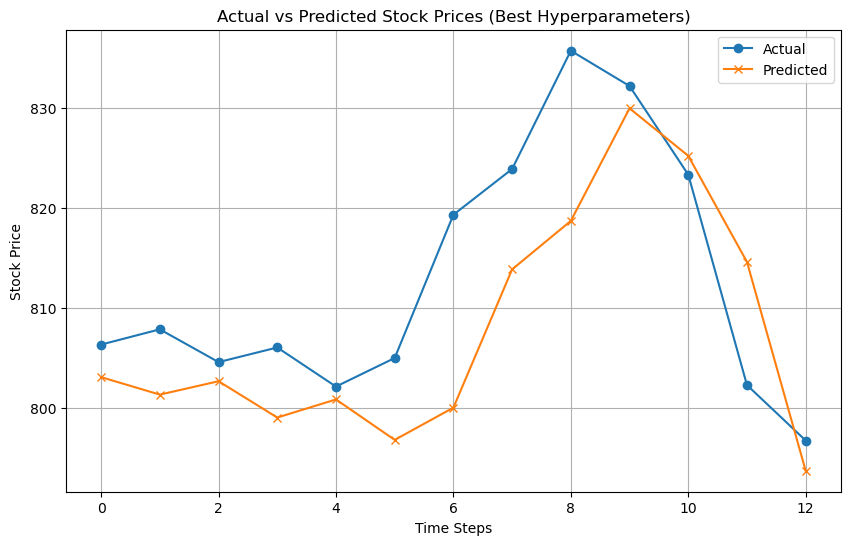

In [71]:
# # Feature and Target Separation for Test Data
# X_test = test_data[['Open', 'High', 'Low', 'Close', 'Volume']]  # Features
# y_test = test_data['Close']  # Target (next day's Close price)

# # Scaling Test Features and Target
# X_test_scaled = scaler_X.transform(X_test)  # Use the same scaler from training
# y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()  # Scale target

# # Sequence Generation for Test Data
# def create_sequences(data, target, n_steps):
#     X_seq, y_seq = [], []
#     for i in range(len(data) - n_steps):
#         X_seq.append(data[i:i + n_steps])  # Past n_steps days
#         y_seq.append(target[i + n_steps])  # Next day
#     return np.array(X_seq), np.array(y_seq)

# # Use the Same Sequence Length (N) as in Training
# N = 7  # Ensure consistency with training sequence length
# print(f"Sequence length for test data: {N}")

# # Generate sequences for test data
# X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, N)

# # Verify the shapes of test sequences
# print(f"X_test_seq shape: {X_test_seq.shape} (samples, timesteps, features)")
# print(f"y_test_seq shape: {y_test_seq.shape} (samples)")

# # Check if sequences are generated
# if X_test_seq.shape[0] > 0:
#     # Predict on Test Data
#     y_test_pred = final_model.predict(X_test_seq)

#     # Evaluate Model Performance
#     from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#     mse = mean_squared_error(y_test_seq, y_test_pred)
#     mae = mean_absolute_error(y_test_seq, y_test_pred)
#     r2 = r2_score(y_test_seq, y_test_pred)

#     print(f"\nEvaluation Metrics:")
#     print(f"MSE: {mse:.6f}")
#     print(f"MAE: {mae:.6f}")
#     print(f"R² Score: {r2:.6f}")

#     # Optional: Inverse Transform Predictions to Original Scale
#     y_test_pred_original = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1))
#     y_test_seq_original = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1))

#     # Display Sample Predictions
#     print("\nSample Predictions (Original Scale):")
#     print(f"Predicted: {y_test_pred_original[:5].flatten()}")
#     print(f"Actual: {y_test_seq_original[:5].flatten()}")

# else:
#     print("Not enough test data to generate sequences.")


# Predict on test data
y_test_pred = final_model.predict(X_test_seq)

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_seq, y_test_pred)
mae = mean_absolute_error(y_test_seq, y_test_pred)
r2 = r2_score(y_test_seq, y_test_pred)

print(f"Test MSE: {mse:.6f}")
print(f"Test MAE: {mae:.6f}")
print(f"Test R² Score: {r2:.6f}")

# Optional: Inverse transform predictions to original scale
y_test_pred_original = scaler_y.inverse_transform(y_test_pred)
y_test_seq_original = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1))

# Visualize predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_seq_original, label='Actual', marker='o')
plt.plot(y_test_pred_original, label='Predicted', marker='x')
plt.title('Actual vs Predicted Stock Prices (Best Hyperparameters)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()

# LSTM

### Training LSTM

In [83]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.optimizers import Adam

# # Build LSTM model
# lstm_model = Sequential([
#     LSTM(
#         units=128,  # Number of LSTM units
#         activation='tanh',  # Recommended activation for LSTMs
#         input_shape=(X_train.shape[1], X_train.shape[2]),  # (timesteps, features)
#         return_sequences=False  # Set to True if stacking LSTM layers
#     ),
#     Dropout(0.1),  # Regularization to prevent overfitting
#     Dense(1)  # Output layer for regression
# ])

# # Compile the model
# lstm_model.compile(
#     optimizer=Adam(learning_rate=0.01),  # Learning rate
#     loss='mse',  # Mean Squared Error for regression
#     metrics=['mae']  # Mean Absolute Error as additional metric
# )

# # Train the model
# history = lstm_model.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),  # Validation set
#     epochs=50,  # Number of epochs
#     batch_size=64,  # Batch size
#     verbose=1  # Show training progress
# )

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the improved LSTM model
lstm_model = Sequential([
    # First LSTM layer
    LSTM(
        units=128,  # Number of LSTM units
        activation='tanh',
        return_sequences=True,  # Output sequences to the next LSTM layer
        input_shape=(X_train.shape[1], X_train.shape[2])  # (timesteps, features)
    ),
    Dropout(0.2),

    # # Second LSTM layer
    # LSTM(
    #     units=128,  # Number of LSTM units
    #     activation='tanh',
    #     return_sequences=True  # Final LSTM layer outputs a single vector
    # ),
    # Dropout(0.2),

    # LSTM(
    #     units=128,  # Number of LSTM units
    #     activation='tanh',
    #     return_sequences=True  # Final LSTM layer outputs a single vector
    # ),
    # Dropout(0.2),

    LSTM(
        units=128,  # Number of LSTM units
        activation='tanh',
        return_sequences=False  # Final LSTM layer outputs a single vector
    ),
    Dropout(0.2),

    # Fully connected Dense layers
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),

    # Final output layer
    Dense(1)  # Output layer for regression
])

# Compile the model
lstm_model.compile(
    optimizer=Adam(learning_rate=0.001),  # Reduced learning rate for better convergence
    loss='mse',  # Mean Squared Error for regression
    metrics=['mae']  # Mean Absolute Error as an additional metric
)

# Train the model
history = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),  # Validation set
    epochs=100,  # Increased number of epochs for better training
    batch_size=32,  # Reduced batch size for more frequent updates
    verbose=1  # Show training progress
)

Epoch 1/100


C:\Users\akifk\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0632 - mae: 0.1775 - val_loss: 0.0045 - val_mae: 0.0421
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0103 - mae: 0.0687 - val_loss: 0.0072 - val_mae: 0.0624
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0101 - mae: 0.0660 - val_loss: 0.0036 - val_mae: 0.0331
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0077 - mae: 0.0577 - val_loss: 0.0033 - val_mae: 0.0288
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0094 - mae: 0.0673 - val_loss: 0.0032 - val_mae: 0.0272
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0075 - mae: 0.0540 - val_loss: 0.0041 - val_mae: 0.0334
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0075 - mae: 0.0573 - val_loss: 0.0033 - val_mae: 0.0312
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0066 - mae: 0.0488 - val_loss: 0.0031 - val_mae: 0.0278
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0066 -

### Evaluating LSTM

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
Test MSE: 0.001351
Test RMSE: 0.036756
Test MAE: 0.033233
Test Accuracy (±5% threshold): 23.08%


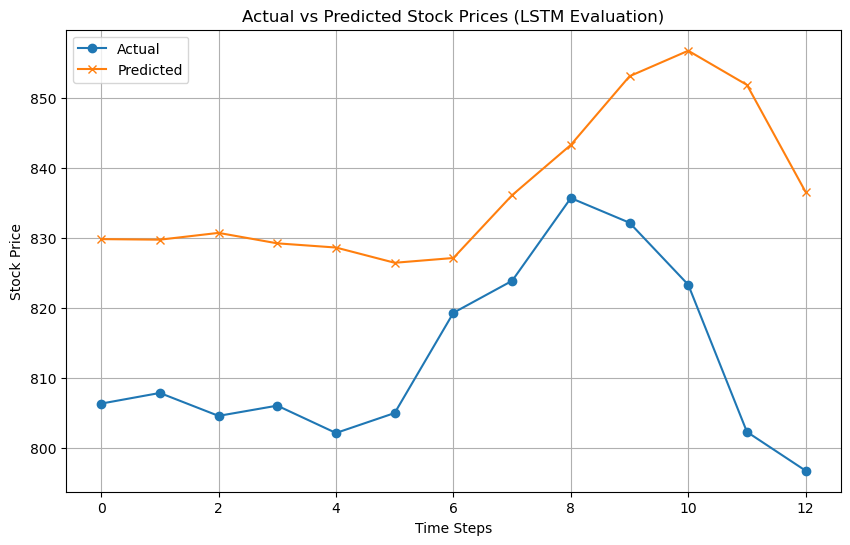

In [84]:
# # Predict on the test set
# y_test_pred = lstm_model.predict(X_test_seq)

# # Evaluate metrics
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# mse = mean_squared_error(y_test_seq, y_test_pred)
# mae = mean_absolute_error(y_test_seq, y_test_pred)
# r2 = r2_score(y_test_seq, y_test_pred)

# print(f"Test MSE: {mse}")
# print(f"Test MAE: {mae}")
# print(f"Test R² Score: {r2}")

# # Optional: Inverse Transform Predictions to Original Scale
# y_test_pred_original = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1))
# y_test_seq_original = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1))

# # Plot actual vs predicted
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 6))
# plt.plot(y_test_seq_original, label='Actual', marker='o')
# plt.plot(y_test_pred_original, label='Predicted', marker='x')
# plt.title('Actual vs Predicted Stock Prices (LSTM)')
# plt.xlabel('Time Steps')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.grid()
# plt.show()


from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predict on test data
y_test_pred = lstm_model.predict(X_test_seq)

# Calculate metrics
mse = mean_squared_error(y_test_seq, y_test_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test_seq, y_test_pred)  # Mean Absolute Error

# Accuracy (percentage of predictions within ±5% of actual values)
threshold = 0.05  # 5% threshold
accuracy = np.mean(np.abs((y_test_pred.flatten() - y_test_seq) / y_test_seq) < threshold) * 100

# Print evaluation metrics
print(f"Test MSE: {mse:.6f}")
print(f"Test RMSE: {rmse:.6f}")
print(f"Test MAE: {mae:.6f}")
print(f"Test Accuracy (±5% threshold): {accuracy:.2f}%")

# Optional: Inverse transform predictions to original scale
y_test_pred_original = scaler_y.inverse_transform(y_test_pred)
y_test_seq_original = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1))

# Visualize predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_seq_original, label='Actual', marker='o')
plt.plot(y_test_pred_original, label='Predicted', marker='x')
plt.title('Actual vs Predicted Stock Prices (LSTM Evaluation)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()

### Manual Grid Search

In [85]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Define the hyperparameter grid
param_grid = {
    'units': [64, 128],             # Number of LSTM units
    'dropout_rate': [0.2, 0.3],     # Dropout rates
    'learning_rate': [0.001, 0.005], # Learning rates
    'batch_size': [32, 64],         # Batch sizes
    'num_layers': [2, 3]            # Number of LSTM layers
}

# Placeholder to store results
results = []

# Grid search
for units in param_grid['units']:
    for dropout_rate in param_grid['dropout_rate']:
        for learning_rate in param_grid['learning_rate']:
            for batch_size in param_grid['batch_size']:
                for num_layers in param_grid['num_layers']:
                    
                    # Build the LSTM model dynamically
                    model = Sequential()
                    model.add(LSTM(
                        units=units,
                        activation='tanh',
                        return_sequences=True,
                        input_shape=(X_train.shape[1], X_train.shape[2])
                    ))
                    model.add(Dropout(dropout_rate))
                    
                    # Add additional LSTM layers if required
                    for layer in range(1, num_layers - 1):
                        model.add(LSTM(units=units, activation='tanh', return_sequences=True))
                        model.add(Dropout(dropout_rate))
                    
                    # Final LSTM layer
                    model.add(LSTM(units=units, activation='tanh', return_sequences=False))
                    model.add(Dropout(dropout_rate))
                    
                    # Fully connected Dense layers
                    model.add(Dense(64, activation='relu'))
                    model.add(Dropout(dropout_rate))
                    model.add(Dense(32, activation='relu'))
                    model.add(Dropout(dropout_rate))
                    
                    # Output layer
                    model.add(Dense(1))
                    
                    # Compile the model
                    optimizer = Adam(learning_rate=learning_rate)
                    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
                    
                    # Train the model
                    history = model.fit(
                        X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=50,  # Fewer epochs for faster grid search
                        batch_size=batch_size,
                        verbose=0  # Suppress output for grid search
                    )
                    
                    # Evaluate the model on validation data
                    val_loss = history.history['val_loss'][-1]
                    val_mae = history.history['val_mae'][-1]
                    
                    # Store the results
                    results.append({
                        'units': units,
                        'dropout_rate': dropout_rate,
                        'learning_rate': learning_rate,
                        'batch_size': batch_size,
                        'num_layers': num_layers,
                        'val_loss': val_loss,
                        'val_mae': val_mae
                    })
                    
                    print(f"Tested combination: units={units}, dropout_rate={dropout_rate}, learning_rate={learning_rate}, batch_size={batch_size}, num_layers={num_layers}")
                    print(f"Validation Loss: {val_loss:.6f}, Validation MAE: {val_mae:.6f}")

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Find the best combination
best_combination = results_df.loc[results_df['val_loss'].idxmin()]
print("\nBest Hyperparameters:")
print(best_combination)


C:\Users\akifk\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Tested combination: units=64, dropout_rate=0.2, learning_rate=0.001, batch_size=32, num_layers=2
Validation Loss: 0.001694, Validation MAE: 0.018214
Tested combination: units=64, dropout_rate=0.2, learning_rate=0.001, batch_size=32, num_layers=3
Validation Loss: 0.002085, Validation MAE: 0.023198
Tested combination: units=64, dropout_rate=0.2, learning_rate=0.001, batch_size=64, num_layers=2
Validation Loss: 0.002089, Validation MAE: 0.020553
Tested combination: units=64, dropout_rate=0.2, learning_rate=0.001, batch_size=64, num_layers=3
Validation Loss: 0.002616, Validation MAE: 0.024524
Tested combination: units=64, dropout_rate=0.2, learning_rate=0.005, batch_size=32, num_layers=2
Validation Loss: 0.001013, Validation MAE: 0.019475
Tested combination: units=64, dropout_rate=0.2, learning_rate=0.005, batch_size=32, num_layers=3
Validation Loss: 0.000881, Validation MAE: 0.020260
Tested combination: units=64, dropout_rate=0.2, learning_rate=0.005, batch_size=64, num_layers=2
Validatio

### Training and Evaluating model based on best Hyperparameter Params

Epoch 1/100


C:\Users\akifk\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0667 - mae: 0.1770 - val_loss: 0.0175 - val_mae: 0.1155
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0155 - mae: 0.0893 - val_loss: 0.0040 - val_mae: 0.0394
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0106 - mae: 0.0675 - val_loss: 0.0086 - val_mae: 0.0730
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0113 - mae: 0.0729 - val_loss: 0.0051 - val_mae: 0.0501
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0096 - mae: 0.0562 - val_loss: 0.0032 - val_mae: 0.0269
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0058 - mae: 0.0493 - val_loss: 0.0029 - val_mae: 0.0321
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0057 - mae: 0.0481 - val_loss: 0.0025 - val_mae: 0.0240
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0063 - mae: 0.0522 - val_loss: 0.0042 - val_mae: 0.0466
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0068 -

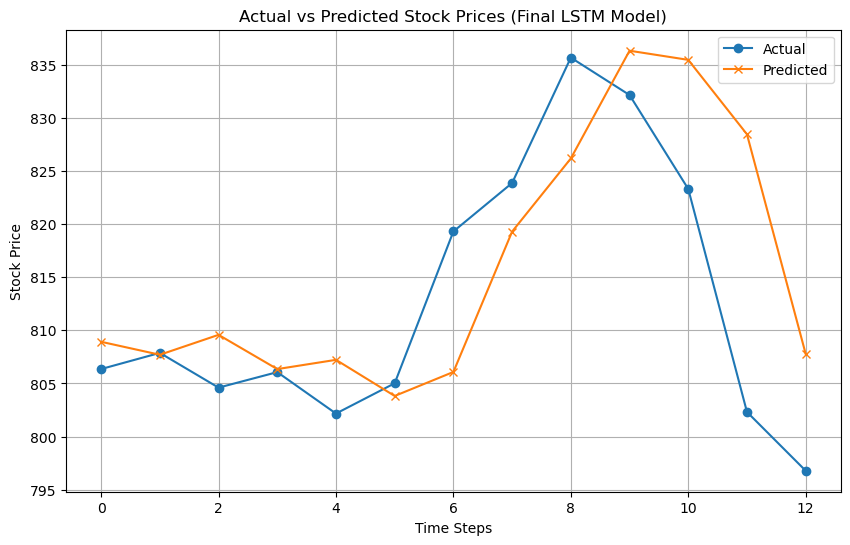

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Extract best hyperparameters
units = int(128)  # Best number of units
dropout_rate = 0.2  # Best dropout rate
learning_rate = 0.005  # Best learning rate
batch_size = int(32)  # Best batch size
num_layers = int(2)  # Best number of layers

# Build the final LSTM model
final_model = Sequential()

# First LSTM layer
final_model.add(LSTM(
    units=units,
    activation='tanh',
    return_sequences=True,
    input_shape=(X_train.shape[1], X_train.shape[2])  # (timesteps, features)
))
final_model.add(Dropout(dropout_rate))

# Add additional LSTM layers dynamically
for layer in range(1, num_layers - 1):
    final_model.add(LSTM(units=units, activation='tanh', return_sequences=True))
    final_model.add(Dropout(dropout_rate))

# Final LSTM layer
final_model.add(LSTM(units=units, activation='tanh', return_sequences=False))
final_model.add(Dropout(dropout_rate))

# Fully connected Dense layers
final_model.add(Dense(64, activation='relu'))
final_model.add(Dropout(dropout_rate))
final_model.add(Dense(32, activation='relu'))
final_model.add(Dropout(dropout_rate))

# Output layer
final_model.add(Dense(1))

# Compile the model
final_optimizer = Adam(learning_rate=learning_rate)
final_model.compile(optimizer=final_optimizer, loss='mse', metrics=['mae'])

# Train the final model
history = final_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,  # Full training epochs
    batch_size=batch_size,
    verbose=1
)


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Predict on test data
y_test_pred = final_model.predict(X_test_seq)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_seq, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_seq, y_test_pred)
r2 = r2_score(y_test_seq, y_test_pred)

# Accuracy (percentage of predictions within ±5% of actual values)
threshold = 0.05  # 5% threshold
accuracy = np.mean(np.abs((y_test_pred.flatten() - y_test_seq) / y_test_seq) < threshold) * 100

# Print evaluation metrics
print(f"Test MSE: {mse:.6f}")
print(f"Test RMSE: {rmse:.6f}")
print(f"Test MAE: {mae:.6f}")
print(f"Test R² Score: {r2:.6f}")
print(f"Test Accuracy (±5% threshold): {accuracy:.2f}%")

# Optional: Inverse transform predictions to original scale
y_test_pred_original = scaler_y.inverse_transform(y_test_pred)
y_test_seq_original = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1))

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test_seq_original, label='Actual', marker='o')
plt.plot(y_test_pred_original, label='Predicted', marker='x')
plt.title('Actual vs Predicted Stock Prices (Final LSTM Model)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()

# GRU

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Best hyperparameters from earlier tuning (adjust as needed)
units = 64  # Increased GRU units
dropout_rate = 0.2  # Increased dropout for regularization
learning_rate = 0.005  # Reduced learning rate for stable training
batch_size = 32  # Optimal batch size

from tensorflow.keras.regularizers import l2

gru_model = Sequential()

# First GRU layer
gru_model.add(GRU(
    units=128,
    activation='tanh',
    return_sequences=True,
    input_shape=(X_train.shape[1], X_train.shape[2])
))
gru_model.add(Dropout(0.2))

# Second GRU layer
gru_model.add(GRU(units=128, activation='tanh', return_sequences=True))
gru_model.add(Dropout(0.2))

# Third GRU layer
gru_model.add(GRU(units=128, activation='tanh', return_sequences=False))
gru_model.add(Dropout(0.2))

# Fully connected Dense layers with L2 regularization
gru_model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
gru_model.add(Dropout(0.3))
gru_model.add(Dense(64, activation='relu'))
gru_model.add(Dropout(0.3))

# Output layer
gru_model.add(Dense(1))

# Compile the model
gru_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Train the model
history_gru = gru_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.1598 - mae: 0.1451 - val_loss: 0.0973 - val_mae: 0.0528
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0973 - mae: 0.0799 - val_loss: 0.0714 - val_mae: 0.0493
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0683 - mae: 0.0648 - val_loss: 0.0500 - val_mae: 0.0466
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0499 - mae: 0.0617 - val_loss: 0.0452 - val_mae: 0.0862
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0402 - mae: 0.0680 - val_loss: 0.0274 - val_mae: 0.0448
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0280 - mae: 0.0547 - val_loss: 0.0199 - val_mae: 0.0303
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0217 - mae: 0.0502 - val_loss: 0.0155 - val_mae: 0.0254
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0196 - mae: 0.0515 - val_loss: 0.0134 - val_mae: 0.0402
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Test MSE: 0.000608
Test RMSE: 0.024661
Test MAE: 0.017901
Test R² Score: -1.202008
Test Accuracy (±5% threshold): 69.23%


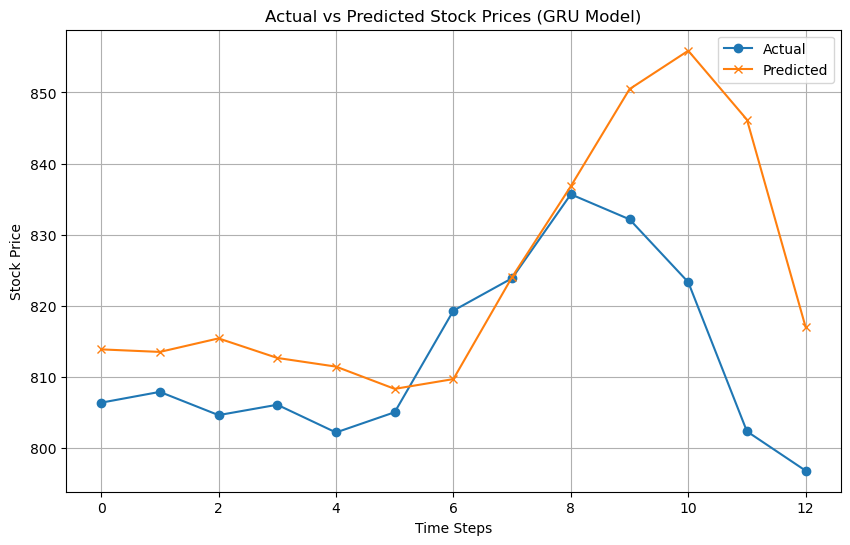

In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Predict on test data
y_test_pred = gru_model.predict(X_test_seq)

# Calculate metrics
mse = mean_squared_error(y_test_seq, y_test_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test_seq, y_test_pred)  # Mean Absolute Error
r2 = r2_score(y_test_seq, y_test_pred)  # R² Score

# Accuracy (percentage of predictions within ±5% of actual values)
threshold = 0.05  # 5% threshold
accuracy = np.mean(np.abs((y_test_pred.flatten() - y_test_seq) / y_test_seq) < threshold) * 100

# Print evaluation metrics
print(f"Test MSE: {mse:.6f}")
print(f"Test RMSE: {rmse:.6f}")
print(f"Test MAE: {mae:.6f}")
print(f"Test R² Score: {r2:.6f}")
print(f"Test Accuracy (±5% threshold): {accuracy:.2f}%")

# Optional: Inverse transform predictions to original scale
y_test_pred_original = scaler_y.inverse_transform(y_test_pred)
y_test_seq_original = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1))

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test_seq_original, label='Actual', marker='o')
plt.plot(y_test_pred_original, label='Predicted', marker='x')
plt.title('Actual vs Predicted Stock Prices (GRU Model)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()

### Grid Search for finding best Params for GRU

In [93]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Define the hyperparameter grid
param_grid = {
    'units': [64, 128],             # Number of GRU units
    'dropout_rate': [0.2, 0.3],     # Dropout rates
    'learning_rate': [0.001, 0.005], # Learning rates
    'batch_size': [32, 64],         # Batch sizes
    'num_layers': [2, 3]            # Number of GRU layers
}

# Placeholder to store results
results = []

# Grid search
for units in param_grid['units']:
    for dropout_rate in param_grid['dropout_rate']:
        for learning_rate in param_grid['learning_rate']:
            for batch_size in param_grid['batch_size']:
                for num_layers in param_grid['num_layers']:
                    
                    # Build the GRU model dynamically
                    model = Sequential()
                    
                    # First GRU layer
                    model.add(GRU(
                        units=units,
                        activation='tanh',
                        return_sequences=True,
                        input_shape=(X_train.shape[1], X_train.shape[2])
                    ))
                    model.add(Dropout(dropout_rate))
                    
                    # Add additional GRU layers if required
                    for layer in range(1, num_layers - 1):
                        model.add(GRU(units=units, activation='tanh', return_sequences=True))
                        model.add(Dropout(dropout_rate))
                    
                    # Final GRU layer
                    model.add(GRU(units=units, activation='tanh', return_sequences=False))
                    model.add(Dropout(dropout_rate))
                    
                    # Fully connected Dense layers
                    model.add(Dense(64, activation='relu'))
                    model.add(Dropout(dropout_rate))
                    model.add(Dense(32, activation='relu'))
                    model.add(Dropout(dropout_rate))
                    
                    # Output layer
                    model.add(Dense(1))
                    
                    # Compile the model
                    optimizer = Adam(learning_rate=learning_rate)
                    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
                    
                    # Train the model
                    history = model.fit(
                        X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=50,  # Fewer epochs for faster grid search
                        batch_size=batch_size,
                        verbose=0  # Suppress output for grid search
                    )
                    
                    # Evaluate the model on validation data
                    val_loss = history.history['val_loss'][-1]
                    val_mae = history.history['val_mae'][-1]
                    
                    # Store the results
                    results.append({
                        'units': units,
                        'dropout_rate': dropout_rate,
                        'learning_rate': learning_rate,
                        'batch_size': batch_size,
                        'num_layers': num_layers,
                        'val_loss': val_loss,
                        'val_mae': val_mae
                    })
                    
                    print(f"Tested combination: units={units}, dropout_rate={dropout_rate}, learning_rate={learning_rate}, batch_size={batch_size}, num_layers={num_layers}")
                    print(f"Validation Loss: {val_loss:.6f}, Validation MAE: {val_mae:.6f}")

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Find the best combination
best_combination = results_df.loc[results_df['val_loss'].idxmin()]
print("\nBest Hyperparameters:")
print(best_combination)

C:\Users\akifk\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Tested combination: units=64, dropout_rate=0.2, learning_rate=0.001, batch_size=32, num_layers=2
Validation Loss: 0.001550, Validation MAE: 0.026342
Tested combination: units=64, dropout_rate=0.2, learning_rate=0.001, batch_size=32, num_layers=3
Validation Loss: 0.001595, Validation MAE: 0.025309
Tested combination: units=64, dropout_rate=0.2, learning_rate=0.001, batch_size=64, num_layers=2
Validation Loss: 0.002502, Validation MAE: 0.039237
Tested combination: units=64, dropout_rate=0.2, learning_rate=0.001, batch_size=64, num_layers=3
Validation Loss: 0.002164, Validation MAE: 0.029572
Tested combination: units=64, dropout_rate=0.2, learning_rate=0.005, batch_size=32, num_layers=2
Validation Loss: 0.001573, Validation MAE: 0.033451
Tested combination: units=64, dropout_rate=0.2, learning_rate=0.005, batch_size=32, num_layers=3
Validation Loss: 0.002613, Validation MAE: 0.038420
Tested combination: units=64, dropout_rate=0.2, learning_rate=0.005, batch_size=64, num_layers=2
Validatio

### Training and Evaluating GRU with Best Hyperparameters

Epoch 1/100


C:\Users\akifk\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1267 - mae: 0.1686 - val_loss: 0.0524 - val_mae: 0.0827
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0470 - mae: 0.0769 - val_loss: 0.0235 - val_mae: 0.0357
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0254 - mae: 0.0571 - val_loss: 0.0155 - val_mae: 0.0482
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0171 - mae: 0.0597 - val_loss: 0.0323 - val_mae: 0.1296
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0208 - mae: 0.0785 - val_loss: 0.0061 - val_mae: 0.0228
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0118 - mae: 0.0590 - val_loss: 0.0063 - val_mae: 0.0439
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0096 - mae: 0.0528 - val_loss: 0.0039 - val_mae: 0.0268
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0069 - mae: 0.0478 - val_loss: 0.0038 - val_mae: 0.0291
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0085 -

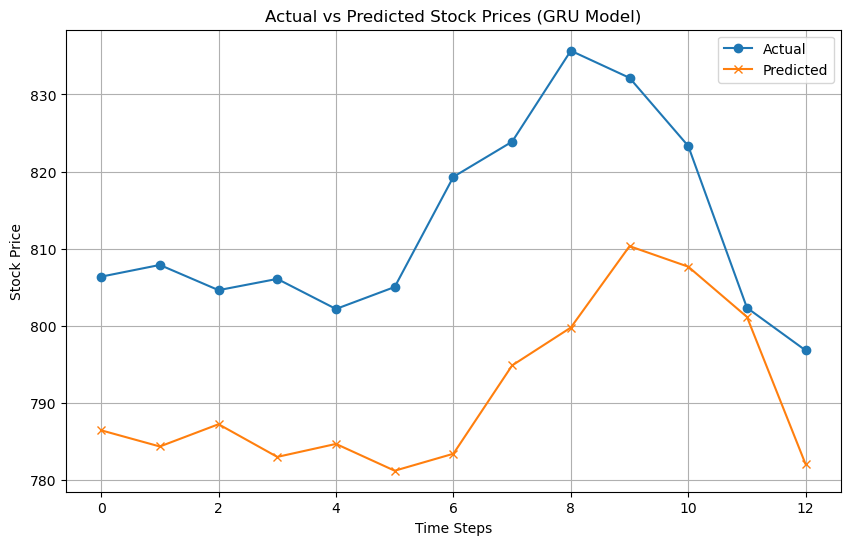

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Best hyperparameters
units = 128
dropout_rate = 0.2
learning_rate = 0.005
batch_size = 32
num_layers = 2

# Build the GRU model
gru_model = Sequential()

# First GRU layer
gru_model.add(GRU(
    units=units,
    activation='tanh',
    return_sequences=True,  # Output sequences to the next GRU layer
    input_shape=(X_train.shape[1], X_train.shape[2])
))
gru_model.add(Dropout(dropout_rate))

# Add additional GRU layers if required
for layer in range(1, num_layers - 1):
    gru_model.add(GRU(units=units, activation='tanh', return_sequences=True))
    gru_model.add(Dropout(dropout_rate))

# Final GRU layer
gru_model.add(GRU(units=units, activation='tanh', return_sequences=False))
gru_model.add(Dropout(dropout_rate))

# Fully connected Dense layers
gru_model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
gru_model.add(Dropout(dropout_rate))
gru_model.add(Dense(32, activation='relu'))
gru_model.add(Dropout(dropout_rate))

# Output layer
gru_model.add(Dense(1))  # Final output layer for regression

# Compile the model
optimizer = Adam(learning_rate=learning_rate)
gru_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model
history = gru_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,  # Train for sufficient epochs
    batch_size=batch_size,
    verbose=1
)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Predict on test data
y_test_pred = gru_model.predict(X_test_seq)

# Calculate metrics
mse = mean_squared_error(y_test_seq, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_seq, y_test_pred)
r2 = r2_score(y_test_seq, y_test_pred)

# Accuracy (percentage of predictions within ±5% of actual values)
threshold = 0.05  # 5% threshold
accuracy = np.mean(np.abs((y_test_pred.flatten() - y_test_seq) / y_test_seq) < threshold) * 100

# Print evaluation metrics
print(f"Test MSE: {mse:.6f}")
print(f"Test RMSE: {rmse:.6f}")
print(f"Test MAE: {mae:.6f}")
print(f"Test R² Score: {r2:.6f}")
print(f"Test Accuracy (±5% threshold): {accuracy:.2f}%")

# Optional: Inverse transform predictions to original scale
y_test_pred_original = scaler_y.inverse_transform(y_test_pred)
y_test_seq_original = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1))

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test_seq_original, label='Actual', marker='o')
plt.plot(y_test_pred_original, label='Predicted', marker='x')
plt.title('Actual vs Predicted Stock Prices (GRU Model)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()